In [58]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt
%matplotlib inline

admissions = pd.read_csv("data/admissions.csv")
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [59]:
#data preprocess is the first step!
admissions = admissions.dropna()
#get dummy variables for pretige
admissions = admissions.join(pd.get_dummies(admissions['prestige'], prefix = 'prestige'))


What if we have the names. Do you think we can have a gender column?
<!--
use google image and sex detection algorithms. 
-->

In [61]:
admissions.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [62]:
admissions.shape

(397, 8)

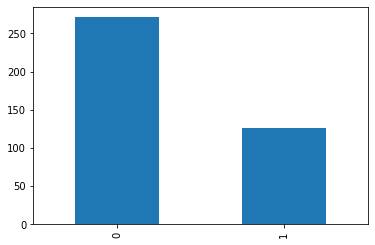

In [63]:
admissions.admit.value_counts().plot(kind = 'bar')

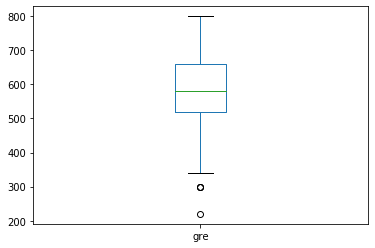

In [64]:
admissions.gre.plot(kind = 'box')

we can bucketize gre to have a better idea about each group of applicants.

In [65]:
def gre_calc(gre):
    if gre < 400:
        new_gre = 1
    elif 400 <= gre <= 500 :
        new_gre = 2
    elif 500 < gre <= 600 :
        new_gre = 3
    elif 600 < gre <= 700 :
        new_gre = 4
    elif 700 < gre <= 800 :
        new_gre = 5
    else:
        new_gre = 6
    return new_gre

admissions['new_gre'] = admissions['gre'].apply(gre_calc)

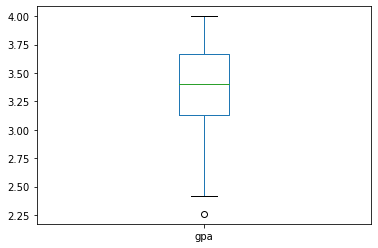

In [12]:
admissions.gpa.plot(kind = 'box')

In [66]:
def gpa_calc(gpa):
    if gpa <= 2.75:
        new_gpa = 1
    elif 2.75 <= gpa <= 3 :
        new_gpa = 2
    elif 3 < gpa <= 3.25 :
        new_gpa = 3
    elif 3.25 < gpa <= 3.5 :
        new_gpa = 4
    elif 3.5 < gpa <= 3.75 :
        new_gpa = 5
    else:
        new_gpa = 6
    return new_gpa
admissions['new_gpa'] = admissions['gpa'].apply(gpa_calc)

In [67]:
admissions.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,new_gre,new_gpa
0,0,380.0,3.61,3.0,0,0,1,0,1,5
1,1,660.0,3.67,3.0,0,0,1,0,4,5
2,1,800.0,4.00,1.0,1,0,0,0,5,6
3,1,640.0,3.19,4.0,0,0,0,1,4,3
4,0,520.0,2.93,4.0,0,0,0,1,3,2


In [68]:
admissions.columns

Index(['admit', 'gre', 'gpa', 'prestige', 'prestige_1.0', 'prestige_2.0',
       'prestige_3.0', 'prestige_4.0', 'new_gre', 'new_gpa'],
      dtype='object')

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = admissions[['gpa', 'prestige_1.0', 'prestige_2.0','prestige_3.0', 'prestige_4.0', 'new_gre', 'new_gpa']]
y = admissions['admit']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=99)
LR = LogisticRegression()

logit = LR.fit(X_train,y_train)
y_pred = logit.predict(X_test)

In [79]:
metrics.confusion_matrix(y_test, y_pred)

array([[63,  2],
       [29,  6]], dtype=int64)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = DecisionTreeClassifier(max_depth=4)


tree_model.fit(X_train,y_train)

y_pred=tree_model.predict(X_test)

metrics.confusion_matrix(y_test, y_pred)

array([[64,  1],
       [30,  5]], dtype=int64)

Question:
    Which model is better?
    
  <!-- 
draw the confusion matrix and discuss
-->

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.81        65
           1       0.83      0.14      0.24        35

    accuracy                           0.69       100
   macro avg       0.76      0.56      0.52       100
weighted avg       0.73      0.69      0.61       100

